# Titanic Project with python

In [592]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [593]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [594]:
train.shape

(891, 12)

In [595]:
test.shape

(418, 11)

In [596]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [597]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [598]:
#missed value 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [599]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [600]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [601]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

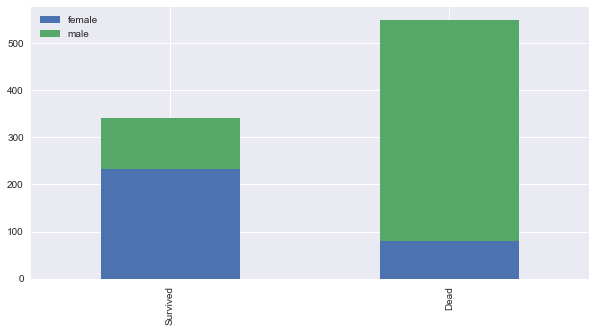

In [602]:
bar_chart('Sex')

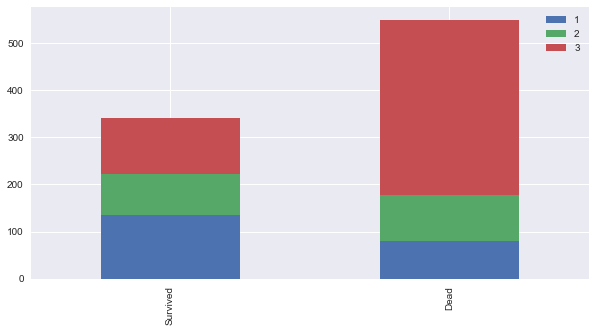

In [603]:
bar_chart('Pclass')

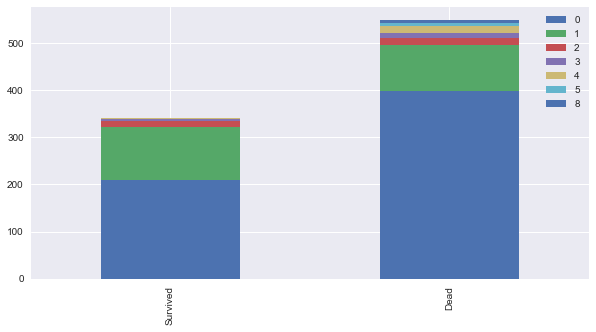

In [604]:
bar_chart('SibSp')

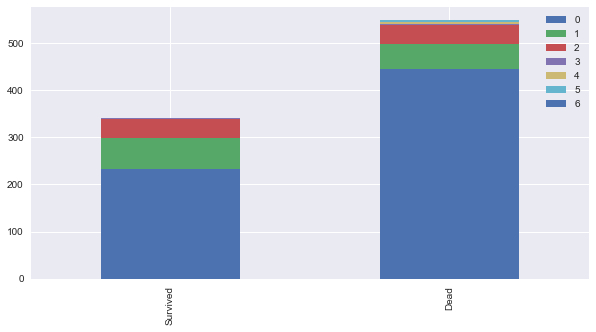

In [605]:
bar_chart('Parch')

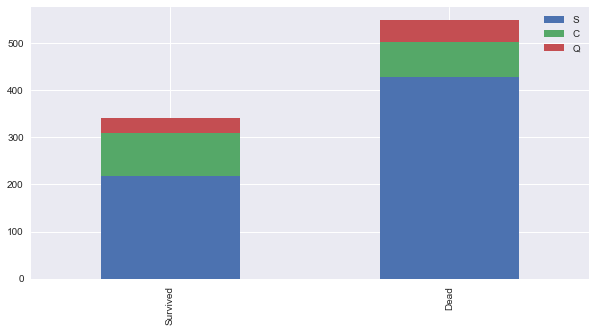

In [606]:
bar_chart('Embarked')

In [607]:
train_test_data = [train, test] 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [608]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Countess      1
Sir           1
Mme           1
Lady          1
Don           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

In [609]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [610]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [611]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


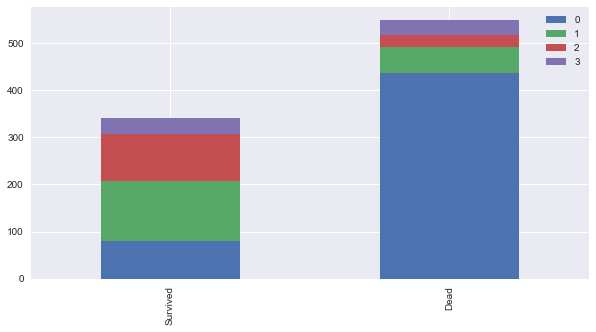

In [612]:
bar_chart('Title')

In [613]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [614]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


মহিলা পুরুষকে ম্যাপিং করি সংখ্যায়

In [615]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [616]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [617]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [618]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

আমরা একটা চার্ট আঁকি এখানে। মারা যাওয়া মানুষগুলোর বয়স ১৬ থেকে ৩৪ এর মধ্যে বেশি দেখা যাচ্ছে আমাদের ছবিতে। তার আগের অথবা পরের বয়সগুলোর মানুষ বেঁচে গিয়েছে বেশি। প্লটে দেখা যাচ্ছে ৩০ বছরের মানুষগুলো মারা গিয়েছে বেশি। আমরা অনেকগুলো চার্ট আঁকবো কারণ আমাদের বয়স কিন্তু একটা বড়ো ক্লাসিফায়ার। প্রথমে কোন লিমিট রাখবো না - মানে শুরু থেকে শেষ পর্যন্ত - facet.set(xlim=(0, train['Age'].max()))

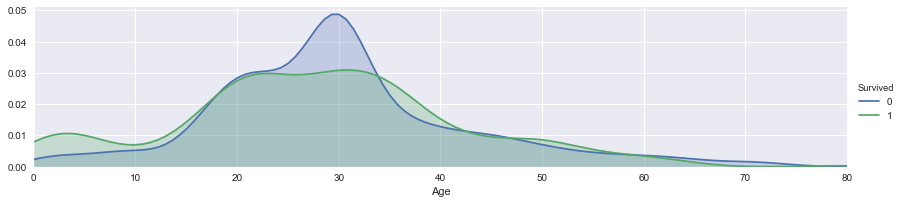

In [619]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0, 20)

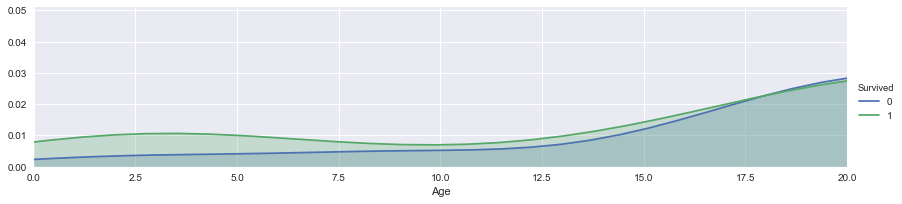

In [620]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(27, 32)

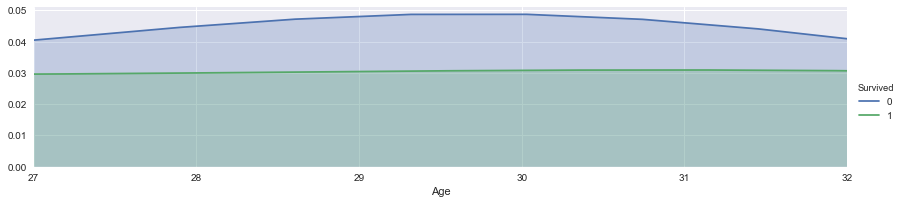

In [621]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(27, 32)

(20, 35)

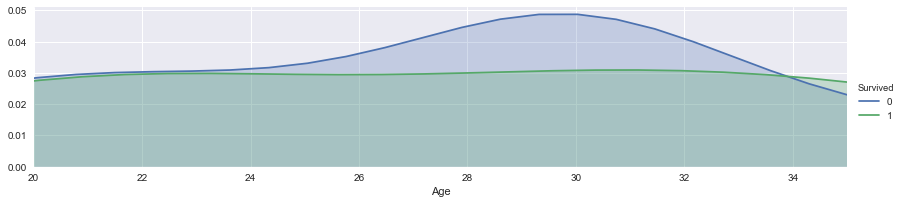

In [622]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 35)

(40, 60)

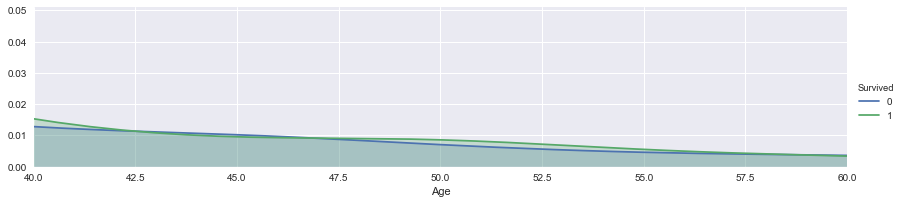

In [623]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

In [624]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [625]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [626]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 17, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 34), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 34) & (dataset['Age'] <= 42), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 42) & (dataset['Age'] <= 55), 'Age'] = 4,
    dataset.loc[(dataset['Age'] > 55) & (dataset['Age'] <= 63), 'Age'] = 5,
    dataset.loc[ dataset['Age'] > 63, 'Age'] = 6

In [627]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S,0


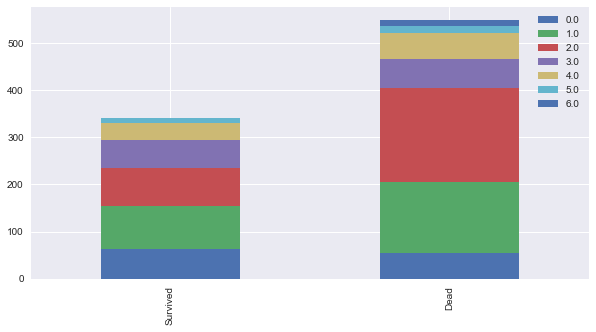

In [628]:
bar_chart('Age')

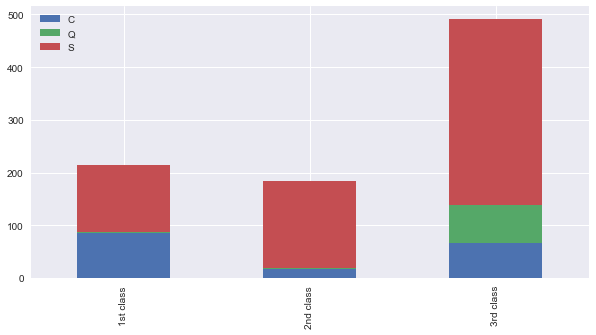

In [629]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [630]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [631]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S,0


প্রতিটা শহরকে একটা সংখ্যা দিয়ে পাল্টে দেই আমাদের হিসেবের সুবিধার কথা চিন্তা করে। "S": 0, "C": 1, "Q": 2

In [632]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [633]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,0,0


ভাড়া মিসিং অংশগুলো ভর্তি করে দেই প্রতিটা শ্রেনীর গড় ভাড়ার ভ্যালু দিয়ে

In [634]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,0,0


 কোন ধরনের ভাড়ার মানুষ বেশি মারা গিয়েছেন

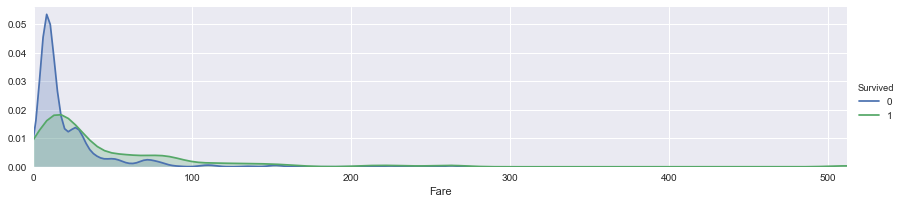

In [635]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

(0, 30)

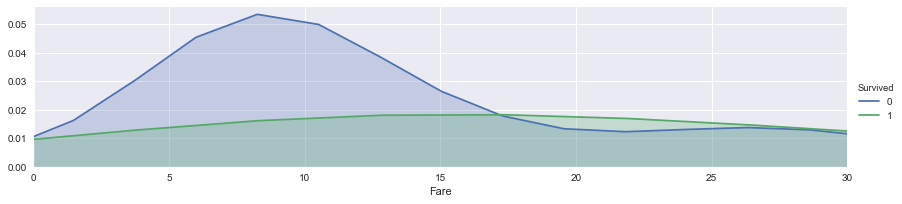

In [636]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(70, 130)

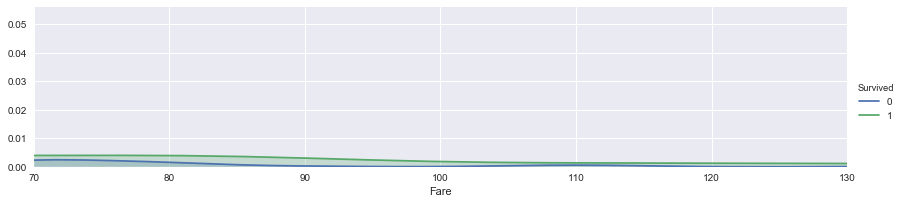

In [637]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(70, 130)

(25, 50)

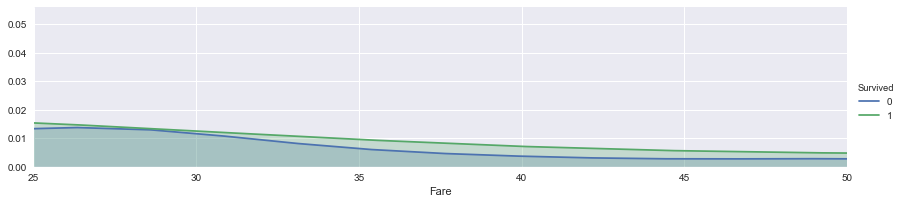

In [638]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(25, 50)

বোঝা যাচ্ছে ৮ ডলার আর তার আশেপাশের টাকা দিয়ে কেনা টিকেটের মালিকদের ভাগ্য সুপ্রসন্ন ছিলো না।

এখানেও ভাগ করি টিকেটের দাম দিয়ে বিভিন্ন 'বিন' মানে ব্যাগে। সেটাকে ম্যাপিং করি সংখ্যায়। আগের মতো।

In [639]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 26), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 30), 'Fare'] = 2,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 70), 'Fare'] = 3,
    dataset.loc[(dataset['Fare'] > 70) & (dataset['Fare'] <= 90), 'Fare'] = 4,
    dataset.loc[(dataset['Fare'] > 90) & (dataset['Fare'] <= 115), 'Fare'] = 5,
    dataset.loc[ dataset['Fare'] > 115, 'Fare'] = 6

In [640]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,4.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,3.0,1,0,113803,3.0,C123,0,2
4,5,0,3,0,3.0,0,0,373450,0.0,NaN,0,0


In [641]:
train.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
C22 C26            3
E101               3
D                  3
F2                 3
F33                3
B28                2
C125               2
E24                2
B77                2
E121               2
C2                 2
C68                2
B58 B60            2
B51 B53 B55        2
C124               2
C126               2
B57 B59 B63 B66    2
D33                2
B18                2
C123               2
E25                2
D26                2
B49                2
C52                2
C65                2
B35                2
D36                2
                  ..
A14                1
C82                1
D37                1
C99                1
C91                1
B101               1
B41                1
E31                1
B82 B84            1
C50                1
F E69              1
C85                1
C32                1
D46                1
C110               1
C90                1
D7           

শুধুমাত্র দরকার প্রথম অক্ষর। str[:1], কারণ এখানে পাওয়া যাবে কোন ক্লাসের কেবিন সেটা। তাহলে একটা ধারণা পাওয়া যাবে জাহাজের কোন এলাকায় ছিলেন একজন যাত্রী।

In [642]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

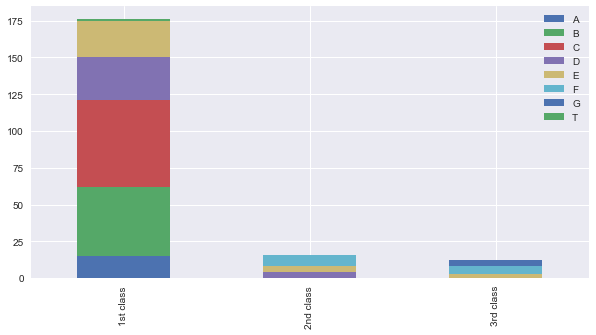

In [643]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

১ম শ্রেণীতে A, B, এবং C আছে। কিন্তু বাকি ক্লাসে A,B, এবং C কিন্তু নেই। তাহলে একটা ম্যাপিং করি সমান স্কেলিং দিয়ে। একই দূরত্বে। 0.4 দিয়ে প্রতিটার দূরত্ব। কেবিন ধরে। সেটার ভাড়া cabin গুলো ভর্তি করি শ্রেণীর গড় দিয়ে।

In [644]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [645]:
# fill missing cabin with median cabin for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [646]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,4.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,3.0,1,0,113803,3.0,0.8,0,2
4,5,0,3,0,3.0,0,0,373450,0.0,2.0,0,0


In [647]:
# family size
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

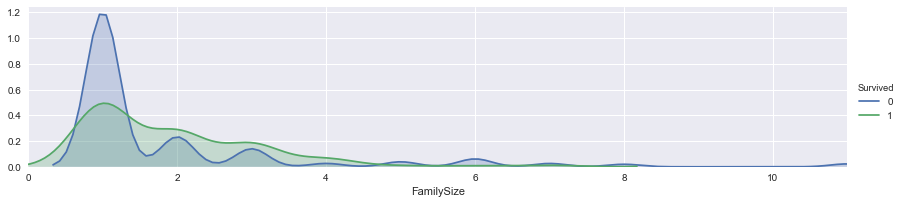

In [648]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [649]:
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

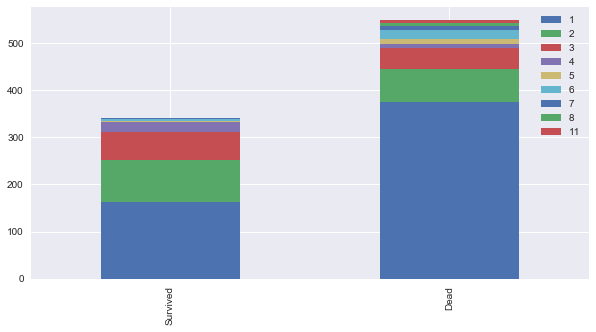

In [650]:
bar_chart('FamilySize')

আবারো পরিবারের ম্যাপিং। ওপরের ছবি বলছে যারা একা ভ্রমণ করছিলেন তারা মারা গিয়েছেন বেশি। এখানে "০" মানে হচ্ছে উনি একা ছিলেন এই টাইটানিক জাহাজে।

In [651]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [652]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,4.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,3.0,1,0,113803,3.0,0.8,0,2,0.4
4,5,0,3,0,3.0,0,0,373450,0.0,2.0,0,0,0.0


অদরকারি ভ্যারিয়েবলগুলো ফেলে দিন। কারণ 'Ticket', 'SibSp', 'Parch' থেকে ফিচার ইঞ্জিনিয়ারিং করে বের করে নিয়েছি নতুন ফিচার।


In [653]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [654]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [655]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,4.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,3.0,3.0,0.8,0,2,0.4
4,3,0,3.0,0.0,2.0,0,0,0.0


# মেশিন লার্নিং মডেলিং

In [656]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import numpy as np

In [657]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


In [658]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

'n_splits=10' মানে এখানে ডাটাসেটকে ১০ ভাগে ভাগ করা হয়েছে। 

এখানে ক্লাসিফায়ারের 'clf' এর 'অ্যাক্যুরেসি' বের করার চেষ্টা করেছি আমরা।

In [659]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.79775281 0.7752809  0.79775281 0.88764045 0.73033708
 0.84269663 0.7752809  0.74157303 0.79775281]


In [660]:
# decision tree Score
round(np.mean(score)*100, 2)

79.13

# র‌্যান্ডম ফরেস্ট

In [661]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.80898876 0.82022472 0.79775281 0.86516854 0.79775281
 0.79775281 0.7752809  0.78651685 0.84269663]


In [662]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.03

আমরা একটা 'submission.csv' তৈরি করবো ক্যাগলে আপলোড করার জন্য।

In [663]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [664]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [665]:
# read submission file 

submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [670]:
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.7752809  0.80898876 0.78651685 0.79775281 0.82022472
 0.80898876 0.83146067 0.82022472 0.85393258]


In [671]:
round(np.mean(score)*100, 2)

81.26

In [672]:
#submission file
clf = LogisticRegression()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [673]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [674]:
# read submission file 

submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
